In [11]:
# Basic Python Modules
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Deep Learning Libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import SGD

warnings.filterwarnings("ignore")
%matplotlib inline

Training Model with sigmoid activation and SGD optimizer....
Epoch 5, Loss: 1.6808713674545288
Epoch 10, Loss: 1.3180464506149292
Epoch 15, Loss: 1.1046034097671509
Epoch 20, Loss: 0.9351963400840759
Epoch 25, Loss: 0.822617769241333
Epoch 30, Loss: 0.7480619549751282
Epoch 35, Loss: 0.6938855648040771
Epoch 40, Loss: 0.652295708656311
Epoch 45, Loss: 0.6184787154197693
Epoch 50, Loss: 0.5891132950782776
Epoch 55, Loss: 0.562894880771637
Epoch 60, Loss: 0.5390698313713074


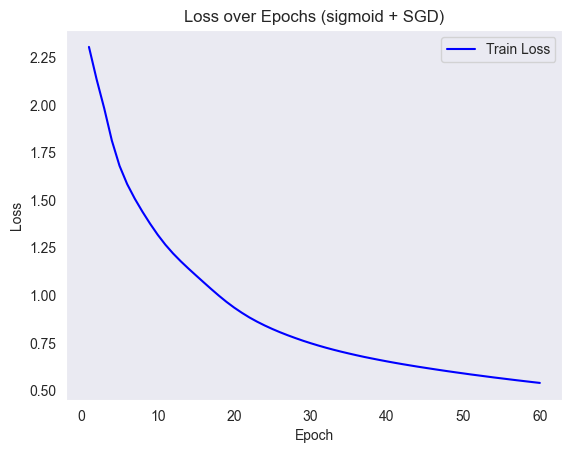

Test Accuracy with activation name: sigmoid and optimizer: SGD -->  0.84


In [10]:
n_hidden_layer_1 = 10 # 1st hidden layer's number of neurons
n_hidden_layer_2 = 5 # 2nd hidden layer's number of neurons
n_input = 784 # MNIST data input (img shape: 28*28)
n_output_layer_classes = 10 # MNIST total classes (0-9 digits)

# Load the MNIST dataset
mnist = tf.keras.datasets.mnist

# Train and Test Splits
(X_train_images, y_train_labels), (X_test_images, y_test_labels) = mnist.load_data()


# Flattening Images
X_train_images = X_train_images.reshape([-1, 28*28]).astype(np.float32)
X_test_images = X_test_images.reshape([-1, 28*28]).astype(np.float32)


# Normalizing the Images
X_train_images = X_train_images / 255.0
X_test_images = X_test_images / 255.0


# One-hot Encoding
y_train_labels = tf.keras.utils.to_categorical(y_train_labels, num_classes=10).astype(np.float32)
y_test_labels = tf.keras.utils.to_categorical(y_test_labels, num_classes=10).astype(np.float32)


# Creating TensorFlow Dataset
train_dataset = tf.data.Dataset\
                .from_tensor_slices((X_train_images, y_train_labels))\
                .shuffle(60000)\
                .batch(100)

test_dataset = tf.data.Dataset\
                .from_tensor_slices((X_test_images, y_test_labels))\
                .batch(100) 


# Weights & Bias Random Initialization
weights = {
    "h1": tf.Variable(tf.random.normal([n_input, n_hidden_layer_1])),
    "h2": tf.Variable(tf.random.normal([n_hidden_layer_1, n_hidden_layer_2])),
    "out": tf.Variable(tf.random.normal([n_hidden_layer_2, n_output_layer_classes]))
}
biases = {
    "b1": tf.Variable(tf.random.normal([n_hidden_layer_1])),
    "b2": tf.Variable(tf.random.normal([n_hidden_layer_2])),
    "out": tf.Variable(tf.random.normal([n_output_layer_classes]))
}


# Building Model
def Model(x, weights, biases, activation): # x is predictors / columns / features of images data
    # Hidden Layer 1
    layer_1 = tf.add(tf.matmul(x, weights["h1"]), biases["b1"]) # i.e., Matrix multiplication ex:- y= mx + c

    if activation == "sigmoid":
        layer_1 = tf.nn.sigmoid(layer_1)

    # Hidden Layer 2
    layer_2 = tf.add(tf.matmul(layer_1, weights["h2"]), biases["b2"]) # i.e., Matrix multiplication ex:- y= mx + c

    if activation == "sigmoid":
        layer_2 = tf.nn.sigmoid(layer_2)

    # Output Layer
    out_layer = tf.add(tf.matmul(layer_2, weights["out"]), biases["out"]) # i.e., Matrix multiplication ex:- y= mx + c 

    return tf.nn.softmax(out_layer)


# Training Step
def train_step(images, labels, model_func, optimizer, loss_func):
    with tf.GradientTape() as tape:
        predictions = model_func(images)
        loss_value = loss_func(labels, predictions)
    grads = tape.gradient(loss_value, [*weights.values(), *biases.values()])
    optimizer.apply_gradients(zip(grads, [*weights.values(), *biases.values()]))    
    return loss_value


# Train Model
def train_model(weights, biases, activation, optimizer, train_dataset, num_epochs):
    loss_func = tf.keras.losses.CategoricalCrossentropy()
    losses = []

    for epoch in range(num_epochs):
        epoch_loss_avg = tf.keras.metrics.Mean()
        for images, labels in train_dataset:
            model_func = lambda x: Model(x, weights, biases, activation)
            loss = train_step(images, labels, model_func, optimizer, loss_func)            
            epoch_loss_avg.update_state(loss) # Loss mean as per batch
        losses.append(epoch_loss_avg.result().numpy())
        if (epoch + 1) % 5 == 0:
            print(f"Epoch {epoch + 1}, Loss: {epoch_loss_avg.result().numpy()}")

    return losses


# Model Accuracy
def model_accuracy(weights, biases, activation, test_dataset):
    accuracy_metric = tf.keras.metrics.CategoricalAccuracy()
    for images, labels in test_dataset:
        predictions = Model(images, weights, biases, activation)
        accuracy_metric.update_state(labels, predictions)
    return accuracy_metric.result().numpy()


# Plot Loss
def plot_loss(num_epochs, losses, title):
    sns.set_style("dark")
    plt.plot(range(1, num_epochs + 1), losses, 'b', label='Train Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title(title)
    plt.legend()
    plt.show()


# Model Hyperparameters
num_epochs = 60
activations = ["sigmoid"]
optimizer_constructors = {
    "SGD": lambda: tf.optimizers.SGD(learning_rate=0.05)
}


# Start Training
for activation in activations:
    for opt_name, opt_constructor in optimizer_constructors.items():
        optimizer = opt_constructor()  # Create a new optimizer instance
        # When opt_constructor() is called, it executes the lambda function, which creates and returns a new tf.optimizers.SGD instance with the specified learning rate.
        print(f"Training Model with {activation} activation and {opt_name} optimizer....")
        losses = train_model(weights, biases, activation, optimizer, train_dataset, num_epochs)
        plot_loss(num_epochs, losses, f"Loss over Epochs ({activation} + {opt_name})")
        test_accuracy = model_accuracy(weights, biases, activation, test_dataset)
        print(f"Test Accuracy with activation name: {activation} and optimizer: {opt_name} --> {test_accuracy: .2f}")

<!--  -->

Training model with sigmoid activation and SGD optimizer...
Epoch 1/60
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1081 - loss: 2.3016 - val_accuracy: 0.1135 - val_loss: 2.3010
Epoch 2/60
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 958us/step - accuracy: 0.1106 - loss: 2.3014 - val_accuracy: 0.1135 - val_loss: 2.3009
Epoch 3/60
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 890us/step - accuracy: 0.1105 - loss: 2.3013 - val_accuracy: 0.1135 - val_loss: 2.3006
Epoch 4/60
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 914us/step - accuracy: 0.1108 - loss: 2.3012 - val_accuracy: 0.1135 - val_loss: 2.3006
Epoch 5/60
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 878us/step - accuracy: 0.1115 - loss: 2.3007 - val_accuracy: 0.1135 - val_loss: 2.3000
Epoch 6/60
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 922us/step - accuracy: 0.1116 - loss: 2.2999 - val_accuracy: 0.1135 - val_loss: 2.2982
Epoch 7/60
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 918us/step - accuracy: 0.1094 - loss: 2.2983 - val_accuracy: 0.1135 - val_loss: 2.2915
Epoch 8/60
600/600 ━━━━━━━━━━━━━

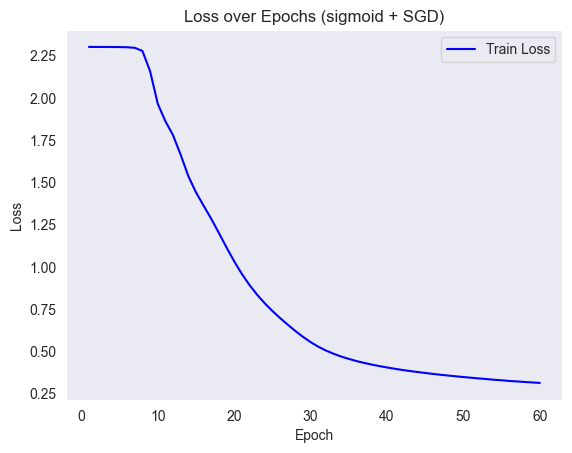

Test Accuracy with sigmoid activation and SGD optimizer:  0.91


In [17]:
# Weights & Bias Random Initializer
initializer = tf.keras.initializers.RandomNormal()


# Building Model
def build_model(activation, initializer):
    model = Sequential()
    model.add(Dense(n_hidden_layer_1, input_shape=(n_input,), kernel_initializer=initializer))
    model.add(Activation(activation))
    model.add(Dense(n_hidden_layer_2, kernel_initializer=initializer))
    model.add(Activation(activation))
    model.add(Dense(n_output_layer_classes, kernel_initializer=initializer))
    model.add(Activation("softmax"))
    return model


# Training and Model Evaluation
def train_and_evaluate(activation, optimizer_class, learning_rate, initializer, 
                        X_train_images, y_train_labels,
                        X_test_images, y_test_labels,
                        num_epochs):
    model = build_model(activation, initializer)
    optimizer = optimizer_class(learning_rate = learning_rate)
    model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])
    history = model.fit(X_train_images, y_train_labels, 
                        epochs=num_epochs, batch_size=100, 
                        validation_data = (X_test_images, y_test_labels), 
                        verbose=1)
    test_loss, test_accuracy = model.evaluate(X_test_images, y_test_labels, verbose=0)
    return history.history["loss"], test_accuracy


# Plot Loss
def plot_loss(num_epochs, losses, title):
    sns.set_style("dark")
    plt.plot(range(1, num_epochs + 1), losses, "b", label="Train Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title(title)
    plt.legend()
    plt.show()


# Model Hyperparameters
num_epochs = 60
activations = ["sigmoid"]
optimizer_constructors = {
    "SGD": (SGD, 0.05)
}


# Start Training
for activation in activations:
    for opt_name, (optimizer_class, learning_rate) in optimizer_constructors.items():
        print(f"Training model with {activation} activation and {opt_name} optimizer...")
        losses, test_accuracy = train_and_evaluate(activation, 
                                                    optimizer_class, 
                                                    learning_rate, 
                                                    initializer,
                                                    X_train_images, y_train_labels,
                                                    X_test_images, y_test_labels,
                                                    num_epochs)
        plot_loss(num_epochs, losses, f"Loss over Epochs ({activation} + {opt_name})")
        print(f"Test Accuracy with {activation} activation and {opt_name} optimizer: {test_accuracy: .2f}")